### PROBLEM STATEMENT
Walmart, one of the largest retail chains in the world, generates massive amounts of sales data across multiple stores and departments. However, raw data alone cannot provide actionable insights. The challenge is to analyze sales patterns, understand the impact of holidays and economic factors, and identify top-performing stores and departments.

The goal of this project is to perform data cleaning, exploratory analysis, and visualization on Walmart’s weekly sales dataset, and then build an interactive Power BI dashboard to help business stakeholders make data-driven decisions on sales performance, store management, and strategic planning.

### Data loading & cleaning
* Fix missing values.
* Convert Date column to proper datetime format.
* Create new time-based columns (Year, Month).
* Remove duplicates/outliers if needed.

Import the necessary libraries for data manipulation, analysis, and visualization.
- `pandas` is used for working with dataframes.
- `matplotlib.pyplot` and `seaborn` are used for creating plots and visualizations.

In [2]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This code block loads the dataset from the specified CSV file into a pandas DataFrame. It then prints the shape of the DataFrame (number of rows and columns) and displays the first few rows to get a glimpse of the data structure and content.

In [3]:
# Step 2: Load dataset
df = pd.read_csv("/content/Walmart.csv")
print("Shape of dataset:", df.shape)
print(df.head())

Shape of dataset: (6435, 8)
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


This code block provides a concise summary of the DataFrame, including the column names, the number of non-null values in each column, and the data types of each column. This helps in understanding the completeness and structure of the data.

In [4]:
# Step 3: Check data info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


This code block generates descriptive statistics for the numerical columns in the DataFrame. It includes counts, mean, standard deviation, minimum, maximum, and quartile values, giving insights into the central tendency, dispersion, and distribution of the numerical data.

In [5]:
print(df.describe())

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000  


This code block performs data cleaning steps on the 'Date' column:
1. It converts the 'Date' column to a proper datetime format using `pd.to_datetime`, specifying the input format as '%d-%m-%Y'.
2. It extracts the year and month from the 'Date' column and creates new 'Year' and 'Month' columns.

In [8]:
# Step 4: Data Cleaning
# 1. Convert Date column
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
# 2. Create Year, Month columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [9]:
# 3. Fill missing values in numerical columns with median
for col in ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

In [10]:
# 4. Drop duplicates (if any)
df = df.drop_duplicates()

### Data Exploration (EDA)
* Analyze total weekly sales trend over time.
* Identify Top 10 stores with highest average weekly sales.
* Compare holiday vs non-holiday sales performance.
* average sales by month
* Check correlation between economic factors (Fuel Price, CPI, Unemployment) and sales.
### Visualization (Python)
* Line chart → Sales trend over time.
* Bar chart → Top 10 stores and departments.
* Boxplot → Holiday vs Non-holiday sales.
* Heatmap → Correlation between sales and economic factors.

This code block calculates the total weekly sales over time by grouping the DataFrame by 'Date' and summing the 'Weekly_Sales' for each date. It then creates a line plot to visualize this trend, showing how total weekly sales change over the observed period.

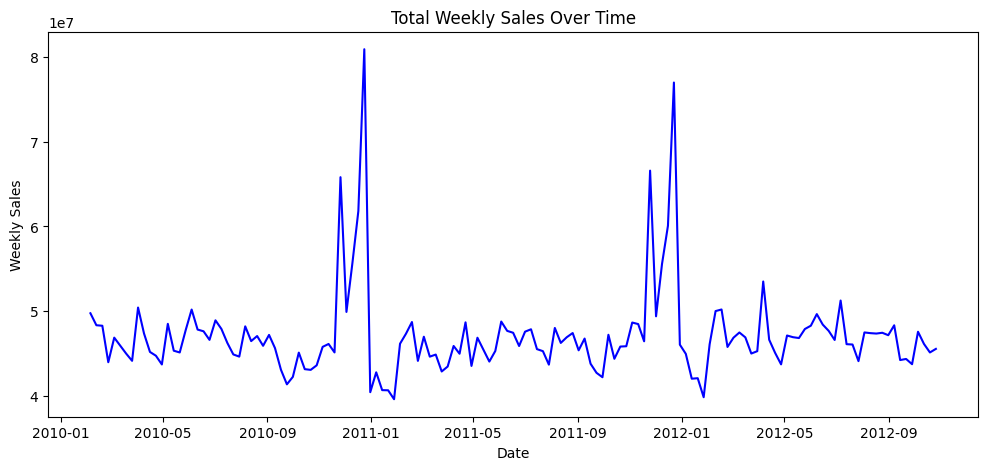

In [11]:
# Step 5: Sales trend over time
sales_trend = df.groupby("Date")["Weekly_Sales"].sum()
plt.figure(figsize=(12,5))
plt.plot(sales_trend.index, sales_trend.values, color="blue")
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()


This code block identifies the top 10 stores with the highest average weekly sales. It groups the DataFrame by 'Store', calculates the mean of 'Weekly_Sales' for each store, sorts the results in descending order, and selects the top 10. A bar plot is then generated to visualize the average weekly sales for these top-performing stores.

/tmp/ipython-input-2574421913.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stores.index, y=top_stores.values, palette="viridis")


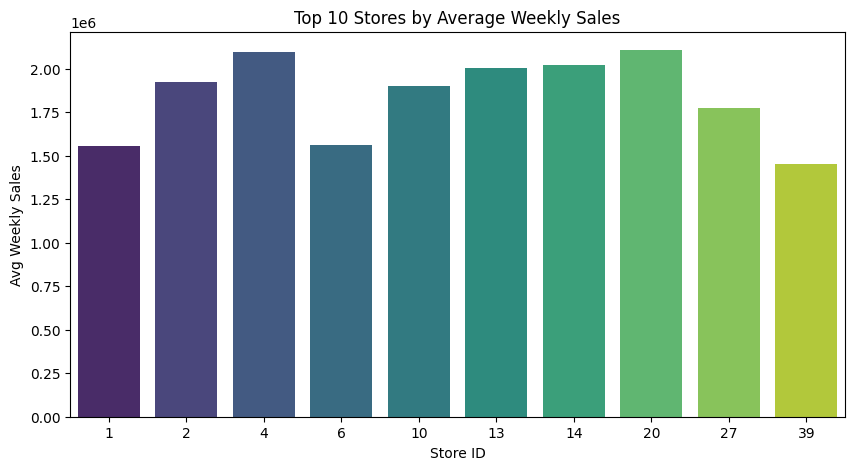

In [12]:
# Step 6: Top 10 stores by average sales
top_stores = df.groupby("Store")["Weekly_Sales"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_stores.index, y=top_stores.values, palette="viridis")
plt.title("Top 10 Stores by Average Weekly Sales")
plt.xlabel("Store ID")
plt.ylabel("Avg Weekly Sales")
plt.show()


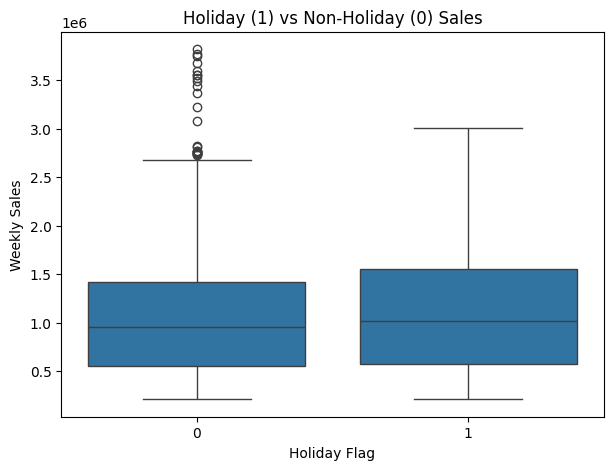

In [13]:
# Step 7: Holiday vs Non-Holiday sales
plt.figure(figsize=(7,5))
sns.boxplot(x="Holiday_Flag", y="Weekly_Sales", data=df)
plt.title("Holiday (1) vs Non-Holiday (0) Sales")
plt.xlabel("Holiday Flag")
plt.ylabel("Weekly Sales")
plt.show()


This code block compares the weekly sales performance during holiday and non-holiday weeks. It uses a boxplot to visualize the distribution of 'Weekly_Sales' for each category of 'Holiday_Flag' (0 for non-holiday, 1 for holiday). This helps in understanding if there is a significant difference in sales during holidays.

/tmp/ipython-input-209988203.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_month_sales.index, y=avg_month_sales.values, palette="viridis")


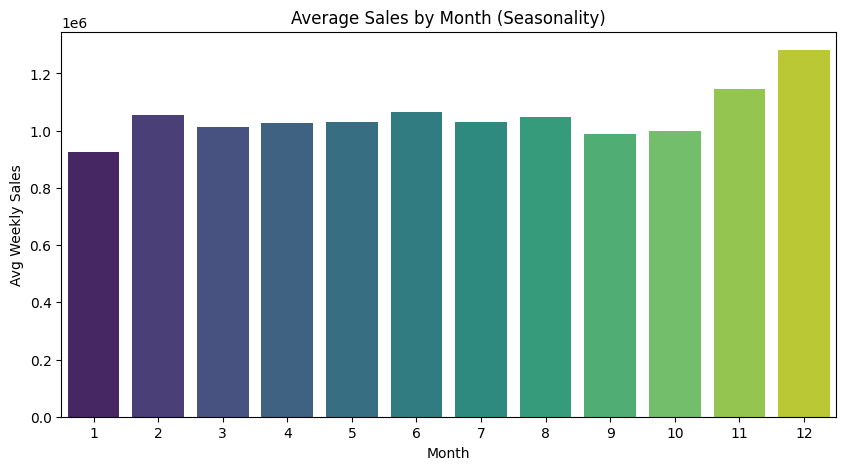

In [17]:
avg_month_sales = df.groupby('Month')['Weekly_Sales'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=avg_month_sales.index, y=avg_month_sales.values, palette="viridis")
plt.title("Average Sales by Month (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Avg Weekly Sales")
plt.show()



This code block calculates the average weekly sales for each month to analyze seasonality in sales. It groups the DataFrame by 'Month', calculates the mean of 'Weekly_Sales' for each month, and then creates a bar plot to visualize the average sales per month.

In [15]:
# show columns
print(df.columns.tolist())


['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month']


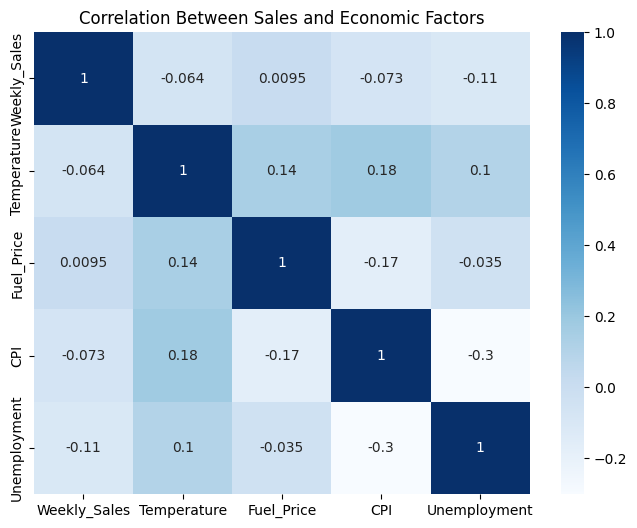

In [18]:
# Step 9: Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]].corr(),
            annot=True, cmap="Blues")
plt.title("Correlation Between Sales and Economic Factors")
plt.show()


This code block generates a heatmap to visualize the correlation between 'Weekly_Sales' and the economic factors ('Temperature', 'Fuel_Price', 'CPI', 'Unemployment'). The heatmap shows the correlation coefficients between these variables, helping to identify potential relationships.

In [19]:
# Step 10: Save cleaned dataset for Power BI
df.to_csv("walmart_cleaned.csv", index=False)
print("Cleaned dataset saved as walmart_cleaned.csv")


Cleaned dataset saved as walmart_cleaned.csv


This code block saves the cleaned DataFrame to a new CSV file named **walmart_cleaned.csv**. The index=False argument prevents writing the DataFrame index as a column in the CSV file. This cleaned dataset is now ready for further analysis or use in tools like Power BI.